<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/WS01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data shape: (32561, 15)


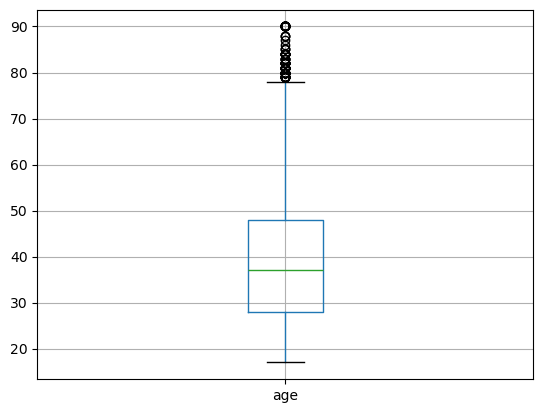

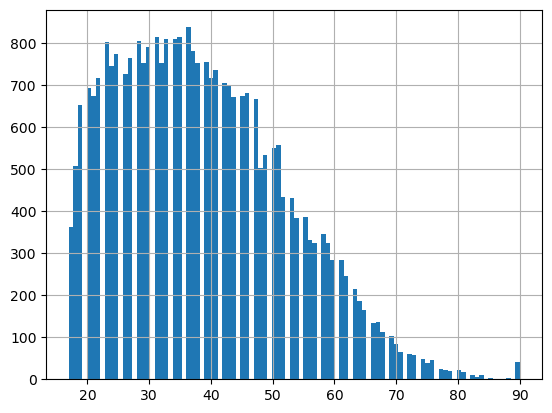


There are 20043 males and 9957 females in the dataset.


C:\Users\andle\AppData\Local\Temp\ipykernel_12096\3783880962.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_males = data.sex.value_counts()[0]
C:\Users\andle\AppData\Local\Temp\ipykernel_12096\3783880962.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_females = data.sex.value_counts()[1]


,age
sex,
Female,36.803254
Male,39.449035


,marital-status,capital-gain Male,capital-gain Female


,min,max
sex,,
Female,17,90
Male,17,90


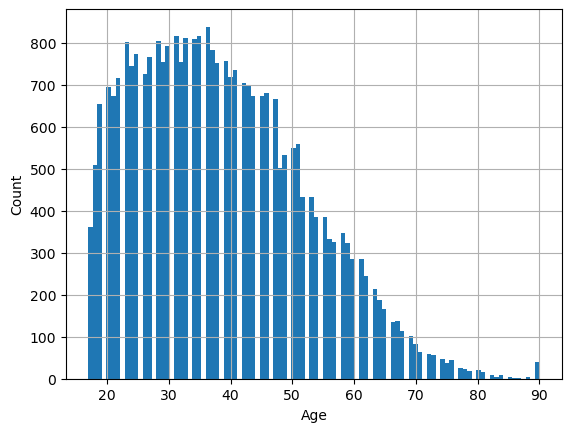

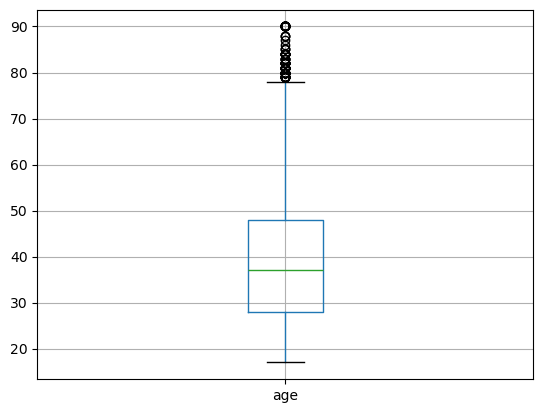

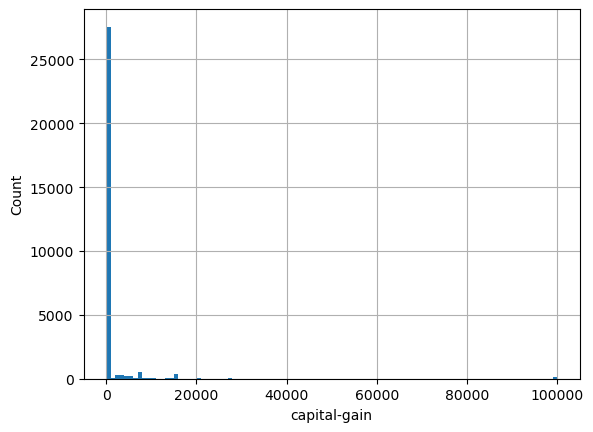

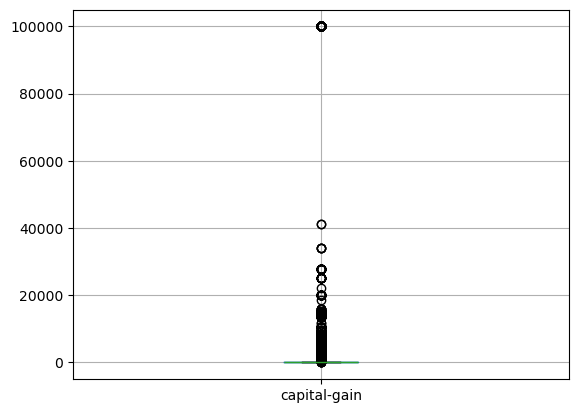

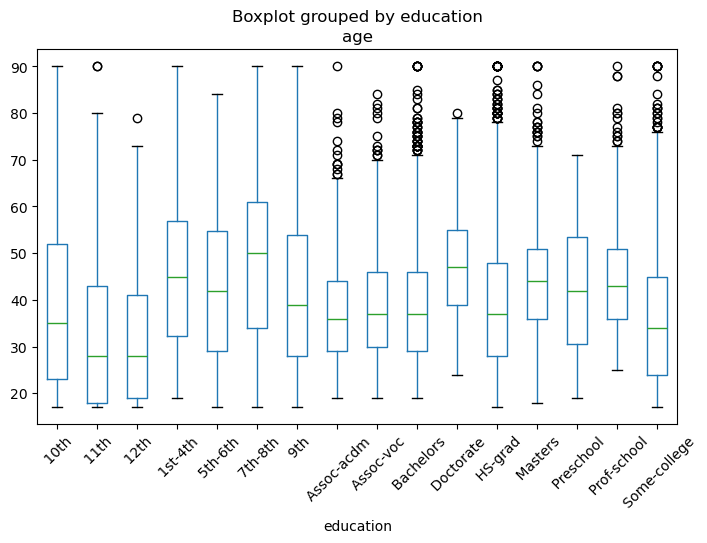

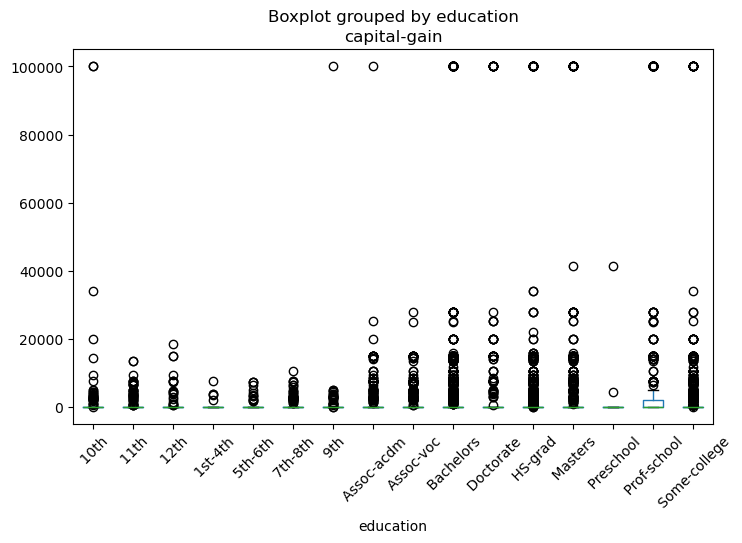

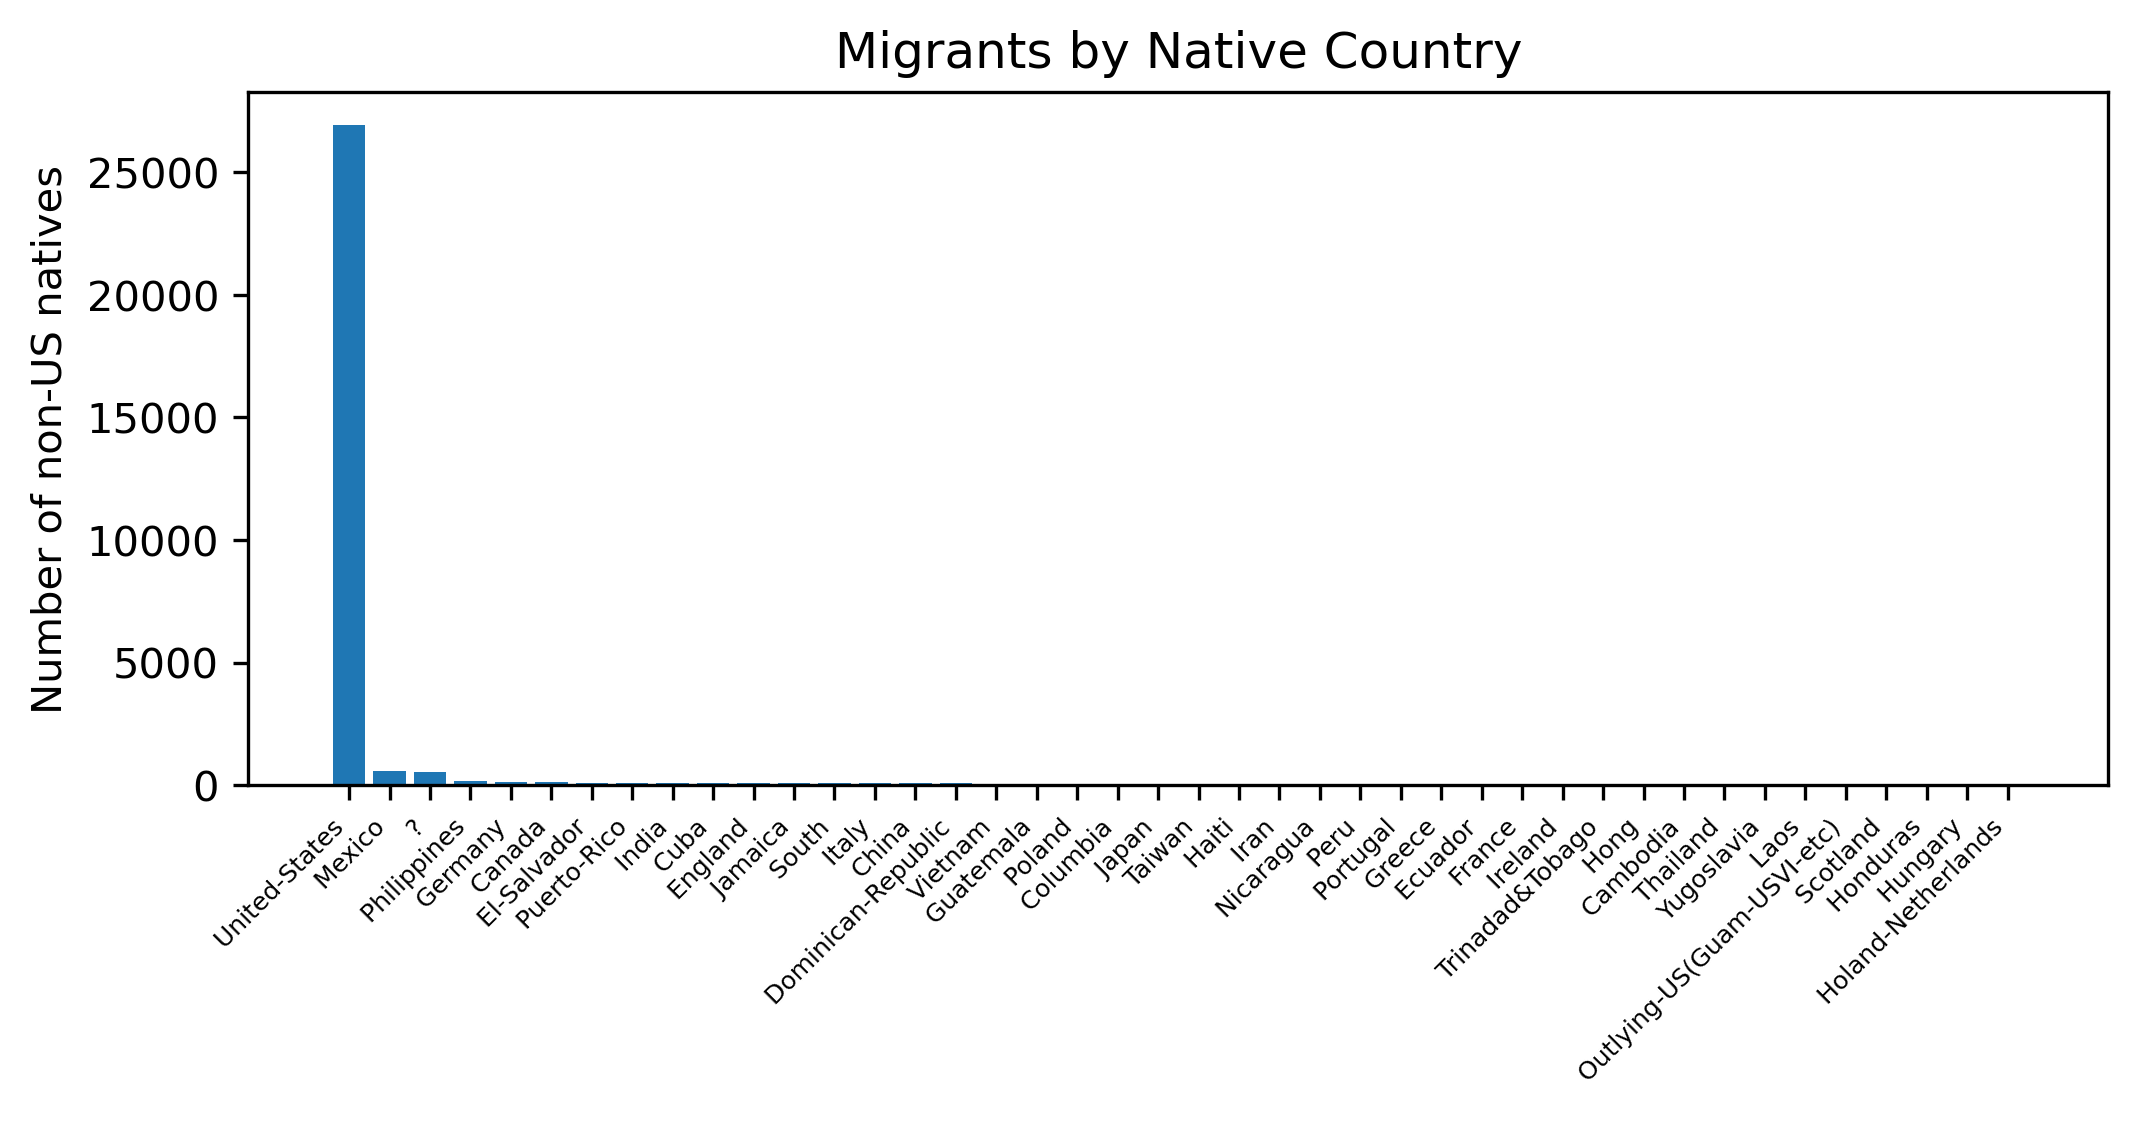

sex,occupation,Female,Male,Total,Percent Male
0,Armed-Forces,NaN,9.0,9.0,100.000000
1,Craft-repair,208.0,3543.0,3751.0,94.454812
2,Transport-moving,84.0,1389.0,1473.0,94.297352
3,Farming-fishing,61.0,863.0,924.0,93.398268
4,Handlers-cleaners,148.0,1106.0,1254.0,88.197767
5,Protective-serv,70.0,523.0,593.0,88.195616
6,Machine-op-inspct,491.0,1333.0,1824.0,73.081140
7,Exec-managerial,1077.0,2680.0,3757.0,71.333511
8,Sales,1179.0,2205.0,3384.0,65.159574
9,Prof-specialty,1390.0,2405.0,3795.0,63.372859


In [ ]:
# Importing necessary libraries
import pandas as pd  # for tabular dataframe
import numpy as np  # for numerical computation
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline

# Loading The Dataset
data = pd.read_csv('adult.csv')

# Display the first row of the dataset
data.head(1)

# Add the feature names to a list
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'class-label']

# Load the dataset again with column names
data = pd.read_csv('adult.csv', names=names)

# Display the first two rows
data.head(2)

# Display the first 10 rows
data.head(10)

# Display the last two rows
data.tail(2)

# Print the shape of the dataset
print(f'data shape: {data.shape}')

# Generating a unique dataset for this task (replace 448 with last three digits of student number)
data = data.sample(n=30000, random_state=236)

# Check the new shape of the dataset
data.shape

# Generate summary statistics
data.describe().T

# Count the occurrences of education-num values
data['education-num'].value_counts()

# Count the occurrences of education values
data['education'].value_counts()

# Drop the fnlwgt column
data = data.drop('fnlwgt', axis=1)

# Verify the shape after dropping a column
data.shape

# Generate descriptive statistics including all columns
data.describe(include='all').T

# Count the occurrences of education values
data['education'].value_counts()

# Count the occurrences of age values
data['age'].value_counts()

# Boxplot for age
data.boxplot(column='age')
plt.show()

# Histogram of age distribution
data['age'].hist(bins=100)
plt.show()

# Compare mean and median age
data.age.mean() > data.age.median()

# Count occurrences of each sex category
data['sex'].value_counts()

# Display column names
data.columns

# Display column names again
data.keys()

# Count occurrences of workclass values
data['workclass'].value_counts()

# Count the number of males and females in the dataset
num_males = data.sex.value_counts()[0]
num_females = data.sex.value_counts()[1]
print(f'\nThere are {num_males} males and {num_females} females in the dataset.')

# Apply groupby function to calculate the mean age of each sex
mean_age_sex = data.age.groupby(data.sex).mean()
display(mean_age_sex.to_frame())

# Calculate the mean age for each sex and education category
data.age.groupby([data.sex, data.education]).mean()

# Calculate average capital-gain for each sex and occupation category
average_capital_gain = data.groupby(['sex', 'occupation'])['capital-gain'].mean().unstack()
average_capital_gain.round(2)

# Extract specific columns
extracted_data = data[['occupation', 'sex', 'capital-gain']]
mean_capital_gain = extracted_data.groupby(['occupation', 'sex'])['capital-gain'].mean().unstack()
mean_capital_gain.columns = ['mean_capital-gain_Female', 'mean_capital-gain_Male']
mean_capital_gain.reset_index(inplace=True)
mean_capital_gain['Total'] = mean_capital_gain['mean_capital-gain_Female'] + mean_capital_gain['mean_capital-gain_Male']
mean_capital_gain.round(2)

# Filter the DataFrame for Male and Female records
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']

# Group by marital-status and calculate the sum of capital-gain for Male and Female
male_grouped = male_data.groupby('marital-status')['capital-gain'].sum().reset_index()
female_grouped = female_data.groupby('marital-status')['capital-gain'].sum().reset_index()

# Rename the capital-gain columns
male_grouped.rename(columns={'capital-gain': 'capital-gain Male'}, inplace=True)
female_grouped.rename(columns={'capital-gain': 'capital-gain Female'}, inplace=True)

# Merge the Male and Female DataFrames
merged_data = pd.merge(male_grouped, female_grouped, on='marital-status')
display(merged_data)

# Find maximum age across different races
data.age.groupby(data.race).max()

# Check if minimum and maximum age by sex are the same
age_range = data.groupby('sex')['age'].agg(['min', 'max'])
display(age_range)
is_min_same = age_range['min'].nunique() == 1
is_max_same = age_range['max'].nunique() == 1

# Histogram of age distribution
data.age.hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot for age
data.boxplot(column='age')
plt.show()

# Histogram for capital-gain
data['capital-gain'].hist(bins=100)
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.show()

# Boxplot for capital-gain
data.boxplot(column='capital-gain')
plt.show()

# Boxplot of age by education
data.boxplot(column='age', by='education', grid=False, rot=45, fontsize=10, figsize=(8, 5))
plt.show()

# Boxplot of capital-gain by education
data.boxplot(column='capital-gain', by='education', grid=False, rot=45, fontsize=10, figsize=(8, 5))
plt.show()

# Check for null values
data.apply(lambda x: sum(x.isnull()), axis=0)

# Apply Label Encoding to categorical variables
from sklearn.preprocessing import LabelEncoder
columns = list(data.select_dtypes(exclude=['int64']))
le = LabelEncoder()
for i in columns:
    data[i] = le.fit_transform(data[i])

# Reload dataset and clean whitespace in categorical columns
data = pd.read_csv('adult.csv', names=names)
data = data.sample(n=30000, random_state=236)
data.occupation = data.occupation.str.strip()
data.sex = data.sex.str.strip()

# Count migrants (excluding US natives)
df = data[data['native-country'] != 'United-States']
country_counts = df['native-country'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)
bars = ax.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.ylabel('Number of non-US natives')
plt.title('Migrants by Native Country')
plt.show()

# Identify occupation with more males than females
occupation_counts = data.groupby(['occupation', 'sex']).size().unstack()
occupation_counts['Total'] = occupation_counts.sum(axis=1)
occupation_counts['Percent Male'] = (occupation_counts['Male'] / occupation_counts['Total']) * 100
occupation_counts = occupation_counts.sort_values('Percent Male', ascending=False)
occupation_counts.reset_index(inplace=True)
display(occupation_counts)
